In [1]:
%run Preprocessing_main.ipynb

In [2]:
# add a column of 1, and take the columns for joining
MVP_data['Nomination'] = np.ones(len(MVP_data)).astype(int)
ref_data = MVP_data[['Player', 'year_y', 'Nomination']]
ref_data.columns = ['Player', 'year', 'Nomination']

In [3]:
# merge columns and fill others with 0
new_adv = all_adv.join(ref_data.set_index(['Player', 'year']), how = 'left', on = ['Player', 'year'])
new_adv['Nomination'] = new_adv['Nomination'].fillna(0).astype(int)
new_adv = new_adv.drop(columns=['Player','Pos','Age','Tm'])
print(new_adv.shape)
new_adv.head()

(2903, 24)


,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year,Nomination
3,82,3223,20.2,0.547,0.075,0.431,8.0,22.7,15.3,15.5,...,6.2,2.6,8.8,0.132,1.8,0.5,2.3,3.5,1999-2000,0
5,82,3070,20.6,0.570,0.288,0.282,3.2,10.5,6.8,17.0,...,9.0,1.0,10.1,0.157,5.0,-2.0,3.0,3.9,1999-2000,0
8,64,2201,16.9,0.542,0.207,0.359,3.9,9.3,6.5,17.9,...,3.1,0.3,3.3,0.073,1.7,-1.9,-0.2,1.0,1999-2000,0
9,82,2593,17.4,0.524,0.223,0.257,2.3,7.9,4.9,26.7,...,5.4,1.9,7.3,0.136,2.6,-1.4,1.2,2.1,1999-2000,0
10,72,2094,11.8,0.479,0.508,0.097,4.1,12.8,8.4,8.6,...,0.3,2.5,2.8,0.064,-0.1,0.4,0.3,1.2,1999-2000,0


In [4]:
# standardize through years
def std_scale_split(data, year_names, test_s, random_s):
    scaler = StandardScaler()
    X_train_result = pd.DataFrame()
    X_test_result = pd.DataFrame()
    y_train_result = pd.DataFrame()
    y_test_result = pd.DataFrame()
    for i in year_names:
        
        data_year = data[data['year']==i]
        data_year = data_year.drop(columns='year')
        
        X = data_year.iloc[:, :-1]
        y = data_year.iloc[:, -1]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_s, random_state = random_s)
        train_scaled = scaler.fit_transform(X_train)
        test_scaled = scaler.transform(X_test)
        
        X_train_result = pd.concat([X_train_result, pd.DataFrame(train_scaled)])
        X_test_result = pd.concat([X_test_result, pd.DataFrame(test_scaled)])
        y_train_result = pd.concat([y_train_result, y_train])
        y_test_result = pd.concat([y_test_result, y_test])
        
    return X_train_result, X_test_result, y_train_result, y_test_result

In [5]:
# standardize through years with SMOTE method
def smote_scale_split(data, year_names, test_s, random_s):
    scaler = StandardScaler()
    X_train_result = pd.DataFrame()
    X_test_result = pd.DataFrame()
    y_train_result = pd.DataFrame()
    y_test_result = pd.DataFrame()
    for i in year_names:
        
        data_year = data[data['year']==i]
        data_year = data_year.drop(columns='year')
        
        X = data_year.iloc[:, :-1]
        y = data_year.iloc[:, -1]

        smote = SMOTE(random_state = 1)
        X, y = smote.fit_resample(X = X, y = y)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_s, random_state = random_s)
        train_scaled = scaler.fit_transform(X_train)
        test_scaled = scaler.transform(X_test)
        
        X_train_result = pd.concat([X_train_result, pd.DataFrame(train_scaled)])
        X_test_result = pd.concat([X_test_result, pd.DataFrame(test_scaled)])
        y_train_result = pd.concat([y_train_result, y_train])
        y_test_result = pd.concat([y_test_result, y_test])
        
    return X_train_result, X_test_result, y_train_result, y_test_result

## 2019-2020 as example

In [6]:
df=new_adv[new_adv['year']=='2019-2020']
df.head()

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year,Nomination
1,72,2417,20.3,0.598,0.018,0.484,8.5,24.9,17.0,24.2,...,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3,2019-2020,0
6,70,1852,20.7,0.664,0.013,0.581,12.3,24.9,18.7,8.9,...,5.2,2.9,8.2,0.212,1.4,1.0,2.3,2.0,2019-2020,0
12,63,1917,31.9,0.613,0.237,0.508,7.7,34.8,22.1,34.2,...,6.1,5.0,11.1,0.279,7.4,4.1,11.5,6.6,2019-2020,1
15,58,1902,12.4,0.525,0.289,0.206,4.0,16.1,10.1,6.4,...,0.4,0.9,1.3,0.033,-1.8,-1.8,-3.6,-0.8,2019-2020,0
16,69,2066,13.2,0.600,0.403,0.180,4.2,14.2,9.3,7.5,...,2.1,3.7,5.7,0.134,-0.8,1.9,1.2,1.7,2019-2020,0


In [7]:
def drop_col(data):
    corr = data.corr()
    NEW_data = data
    del_list = []
    for i in corr:
        for ind in corr[(corr[i]>0.8)&(corr[i]<1)].index:
            if ind not in del_list:
                try:
                    NEW_data = NEW_data.drop(ind, axis = 1)
                except:
                    continue
        del_list.append(i)
    return NEW_data

In [8]:
NEW_data = drop_col(df)
NEW_data = NEW_data.drop(columns = 'year')

#### Preprocessing

In [9]:
X = NEW_data.iloc[:, :-1]
y = NEW_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 1)

pca = PCA(n_components = 4)
X_train = pd.DataFrame(pca.fit_transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))

# Standardize
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

### Logistic regression

In [10]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_scaled, y_train)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X_train.columns).transpose())
# print('AIC', AIC_score(y_test, logit_reg.predict(test_scaled), df = len(train_scaled) + 1))

intercept  -4.701535490119338
              0        1         2         3
coeff  0.526554  2.12705 -2.183615  0.546683


In [11]:
# training confusion matrix
classificationSummary(y_train, logit_reg.predict(train_scaled))
# validation confusion matrix
classificationSummary(y_test, logit_reg.predict(test_scaled))

Confusion Matrix (Accuracy 0.9286)

       Prediction
Actual  0  1
     0 49  1
     1  3  3
Confusion Matrix (Accuracy 0.8947)

       Prediction
Actual  0  1
     0 30  2
     1  2  4


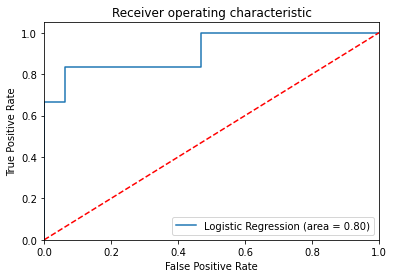

In [12]:
logit_roc_auc = roc_auc_score(y_test, logit_reg.predict(test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, logit_reg.predict_proba(test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest

In [13]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [14]:
classificationSummary(y_test, rf.predict(test_scaled))

Confusion Matrix (Accuracy 0.9211)

       Prediction
Actual  0  1
     0 32  0
     1  3  3


### SVM

In [15]:
svc = SVC(random_state = 1)
svc.fit(train_scaled, y_train)
classificationSummary(y_test, svc.predict(test_scaled))

Confusion Matrix (Accuracy 0.8421)

       Prediction
Actual  0  1
     0 32  0
     1  6  0


### SMOTE logistic

#### Preprocessing

In [16]:
smote = SMOTE(random_state = 1)
re_X, re_y = smote.fit_resample(X = X, y = y)

X_train, X_test, y_train, y_test = train_test_split(re_X, re_y, test_size=0.4, random_state=1)
pca = PCA(n_components = 4)
X_train = pd.DataFrame(pca.fit_transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [17]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_scaled, y_train)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X_train.columns).transpose())
# print('AIC', AIC_score(y_test, logit_reg.predict(test_scaled), df = len(X_train.columns) + 1))

intercept  -0.20628099609200584
              0         1         2         3
coeff  1.414138 -3.500984 -1.594736  0.777245


In [18]:
# training confusion matrix
classificationSummary(y_train, logit_reg.predict(train_scaled))
# validation confusion matrix
classificationSummary(y_test, logit_reg.predict(test_scaled))

Confusion Matrix (Accuracy 0.8571)

       Prediction
Actual  0  1
     0 39  8
     1  6 45
Confusion Matrix (Accuracy 0.9091)

       Prediction
Actual  0  1
     0 32  3
     1  3 28


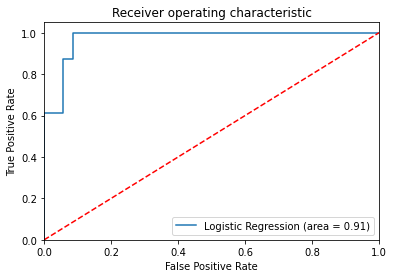

In [19]:
logit_roc_auc = roc_auc_score(y_test, logit_reg.predict(test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, logit_reg.predict_proba(test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SMOTE forest

In [20]:
rf = RandomForestClassifier(n_estimators=50, random_state=1)
rf.fit(train_scaled, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [21]:
classificationSummary(y_test, rf.predict(test_scaled))

Confusion Matrix (Accuracy 0.9091)

       Prediction
Actual  0  1
     0 30  5
     1  1 30


### SMOTE SVM

In [22]:
svc = SVC(random_state = 1)
svc.fit(train_scaled, y_train)
classificationSummary(y_test, svc.predict(test_scaled))

Confusion Matrix (Accuracy 0.9697)

       Prediction
Actual  0  1
     0 34  1
     1  1 30


## All data

In [23]:
df1 = new_adv
all_data = drop_col(df1)
all_data = all_data.dropna()

#### Preprocessing

In [24]:
X_train, X_test, y_train, y_test = std_scale_split(all_data, year_names, test_s = 0.4, random_s = 1)
pca = PCA(n_components = 2)
X_train = pd.DataFrame(pca.fit_transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))

### Random forest

In [25]:
rf = RandomForestClassifier(n_estimators=50, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [26]:
classificationSummary(y_test, rf.predict(X_test))
for_acc = accuracy_score(y_test, rf.predict(X_test))

Confusion Matrix (Accuracy 0.9223)

       Prediction
Actual    0    1
     0 1008   39
     1   52   72


### Logistic regression

In [27]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X_train.columns).transpose())
print('AIC', AIC_score(y_test, logit_reg.predict(X_test), df = len(X_train.columns)
+ 1))

intercept  -4.487109345740257
              0         1
coeff  0.524016  1.613425
AIC 9547.328571814625


In [28]:
# training confusion matrix
classificationSummary(y_train, logit_reg.predict(X_train))
# validation confusion matrix
classificationSummary(y_test, logit_reg.predict(X_test))
log_acc = accuracy_score(y_test, logit_reg.predict(X_test))

Confusion Matrix (Accuracy 0.9319)

       Prediction
Actual    0    1
     0 1526   33
     1   85   88
Confusion Matrix (Accuracy 0.9377)

       Prediction
Actual    0    1
     0 1023   24
     1   49   75


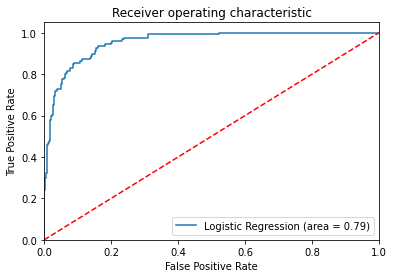

In [29]:
logit_roc_auc = roc_auc_score(y_test, logit_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SVM

In [30]:
svc = SVC(random_state = 1)
svc.fit(X_train, y_train)
classificationSummary(y_test, svc.predict(X_test))
svm_acc = accuracy_score(y_test, svc.predict(X_test))

Confusion Matrix (Accuracy 0.9325)

       Prediction
Actual    0    1
     0 1034   13
     1   66   58


### SMOTE

### preprocessing

In [38]:
X_train, X_test, y_train, y_test = smote_scale_split(all_data, year_names, test_s = 0.4, random_s = 1)
pca = PCA(n_components = 2)
X_train = pd.DataFrame(pca.fit_transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))

### Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=50, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [42]:
classificationSummary(y_test, rf.predict(X_test))
bal_for_acc = accuracy_score(y_test, rf.predict(X_test))

Confusion Matrix (Accuracy 0.9160)

       Prediction
Actual   0   1
     0 947  99
     1  77 971


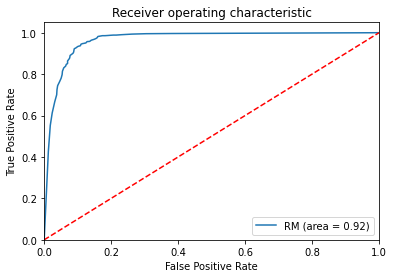

In [43]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RM (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SMOTE logistic regression

In [34]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X_train.columns).transpose())
print('AIC', AIC_score(y_test, logit_reg.predict(X_test), df = len(X_train.columns)
+ 1))

intercept  -0.43355618641462784
              0         1
coeff  1.194071 -2.004659
AIC 20511.458635303272


In [35]:
# training confusion matrix
classificationSummary(y_train, logit_reg.predict(X_train))
# validation confusion matrix
classificationSummary(y_test, logit_reg.predict(X_test))
bal_log_acc = accuracy_score(y_test, logit_reg.predict(X_test))

Confusion Matrix (Accuracy 0.9137)

       Prediction
Actual    0    1
     0 1395  165
     1  104 1454
Confusion Matrix (Accuracy 0.9179)

       Prediction
Actual   0   1
     0 942 104
     1  68 980


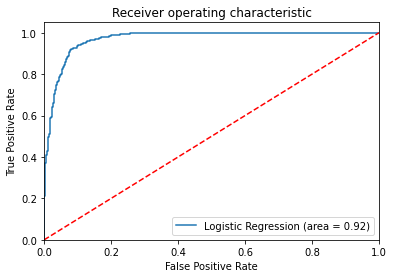

In [36]:
logit_roc_auc = roc_auc_score(y_test, logit_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SMOTE SVM

In [37]:
svc = SVC(random_state = 1)
svc.fit(X_train, y_train)
classificationSummary(y_test, svc.predict(X_test))
bal_svm_acc = accuracy_score(y_test, svc.predict(X_test))

Confusion Matrix (Accuracy 0.9183)

       Prediction
Actual   0   1
     0 934 112
     1  59 989


## Summary

In [83]:
print('Without balancing:')
print('Random forest: {:1.3f}'.format(for_acc))
print('Logistic regression: {:1.3f}'.format(log_acc))
print('Kernel SVM: {:1.3f}'.format(svm_acc))
print('\n')
print('With balancing:')
print('Random forest: {:1.3f}'.format(bal_for_acc))
print('Logistic regression: {:1.3f}'.format(bal_log_acc))
print('Kernel SVM: {:1.3f}'.format(bal_svm_acc))

Without balancing:
Random forest: 0.939
Logistic regression: 0.941
Kernel SVM: 0.942


With balancing:
Random forest: 0.938
Logistic regression: 0.920
Kernel SVM: 0.936
